In [1]:
import datetime
import pandas as pd
from datetime import date, time, datetime, timedelta
import os
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
arquis = os.listdir('dados/')

In [3]:
arquis = sorted(arquis)

In [4]:
df = pd.DataFrame()

In [5]:
for name_arquivo in tqdm(arquis):
        df = df.append(pd.read_csv('dados/'+name_arquivo, sep=';', header=0).fillna('0'))

  0%|          | 0/7 [00:00<?, ?it/s]

In [33]:
df1 = df.loc[(df["estado"]=="CE")]

In [51]:
dt_inicio = '2020-11-01'
dt_fim = '2020-12-31'

In [52]:
df1 = df1.query(f'data >= "{dt_inicio}" & data <= "{dt_fim}"')

In [53]:
df_casos = []

for municipio in df1['municipio'].unique():
    dfAux = df1.query(f'municipio == "{municipio}"')
    df_casos.append({'minicipio':municipio, 'qtd_casos':dfAux['casosNovos'].sum()})

In [45]:
pd.DataFrame(df_casos).iloc[1:185]

,minicipio,qtd_casos
1,Abaiara,160
2,Acarape,1949
3,Acaraú,2760
4,Acopiara,1366
5,Aiuaba,76
...,...,...
180,Uruburetama,816
181,Uruoca,659
182,Varjota,1235
183,Várzea Alegre,1122


In [54]:
dfData = []
for data in df1['data'].unique():
    dfAux = df1.query(f'data == "{data}"')
    dfData.append({'Dia':data,'qtd_casos':dfAux['casosNovos'].sum()})

<AxesSubplot:xlabel='Dia'>

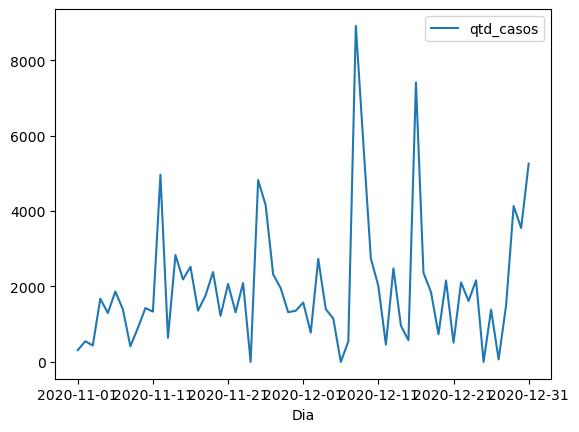

In [55]:
pd.DataFrame(dfData).plot(x = 'Dia', y= 'qtd_casos')

,minicipio,qtd_casos
1,Abaiara,160
2,Acarape,1949
3,Acaraú,2760
4,Acopiara,1366
5,Aiuaba,76
...,...,...
180,Uruburetama,816
181,Uruoca,659
182,Varjota,1235
183,Várzea Alegre,1122
